<a href="https://colab.research.google.com/github/meliusa/PCVK_Genap_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.

Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png) 


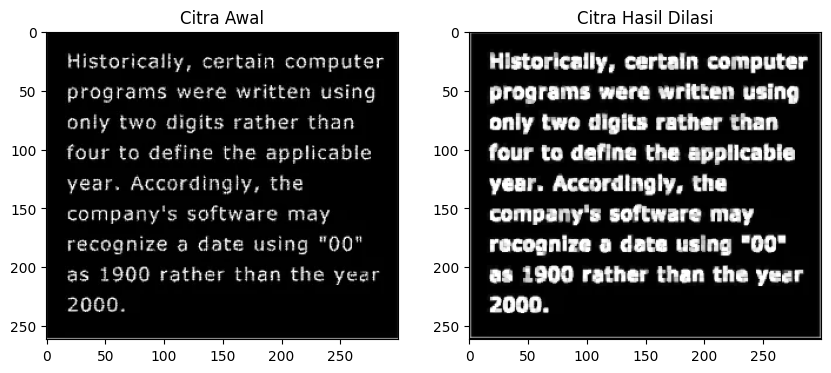

In [23]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks Images/Images/morphology.png', 0)

m, n = img.shape

k = 3
SE = np.ones((k, k), dtype=np.uint8)
constant = (k - 1) // 2

imgDilate = np.zeros((m, n), dtype=np.uint8)

for i in range(constant, m - constant):
    for j in range(constant, n - constant):
        temp = img[i - constant:i + constant + 1, j - constant:j + constant + 1]
        product = temp * SE
        imgDilate[i, j] = np.max(product)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img, cmap="gray")
axs[0].set_title('Citra Awal')
axs[1].imshow(imgDilate, cmap="gray")
axs[1].set_title('Citra Hasil Dilasi')

plt.show()

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)

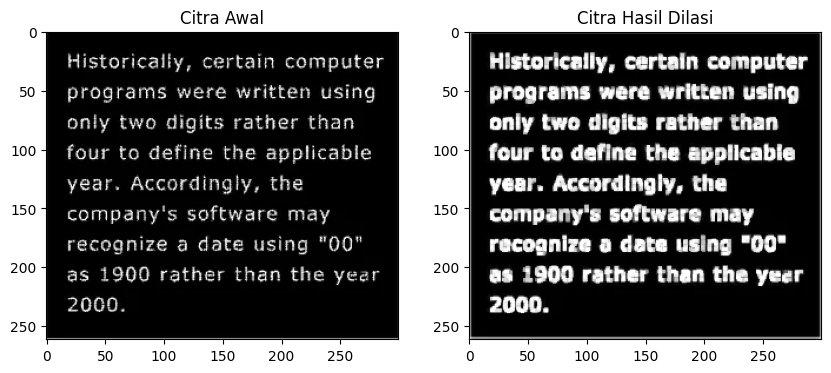

In [26]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks Images/Images/morphology.png', 0)
m, n = img.shape

k = 3
SE = np.ones((k, k), dtype=np.uint8)
constant = (k - 1) // 2

imgDilate = cv.dilate(img, SE, iterations=1)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img, cmap="gray")
axs[0].set_title('Citra Awal')
axs[1].imshow(imgDilate, cmap="gray")
axs[1].set_title('Citra Hasil Dilasi')

plt.show()

# Remove overlapping axes
axs[0].remove()
axs[1].remove()

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png) 


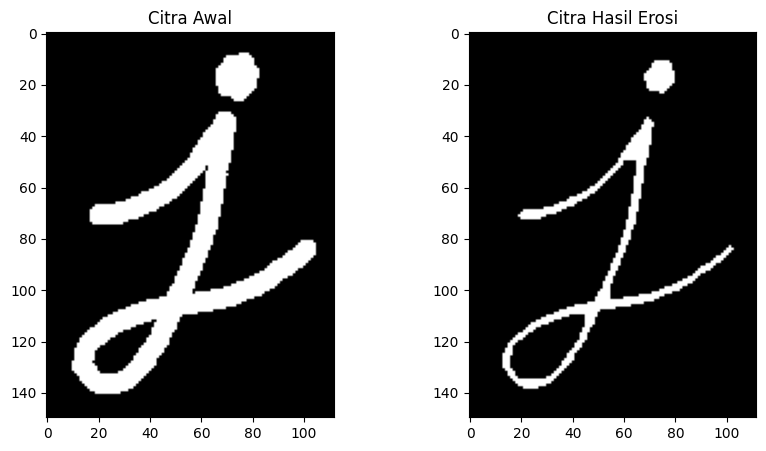

In [30]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks Images/Images/j.png', 0)
m, n = img.shape

k = 5
SE = np.ones((k, k), dtype=np.uint8)
constant = (k - 1) // 2

imgErode = np.zeros((m, n), dtype=np.uint8)

for i in range(constant, m - constant):
    for j in range(constant, n - constant):
        temp = img[i - constant:i + constant + 1, j - constant:j + constant + 1]
        product = temp * SE
        imgErode[i, j] = np.min(product)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img, cmap="gray")
axs[0].set_title('Citra Awal')
axs[1].imshow(imgErode, cmap="gray")
axs[1].set_title('Citra Hasil Erosi')

plt.show()

# Remove overlapping axes
axs[0].remove()
axs[1].remove()

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png) 

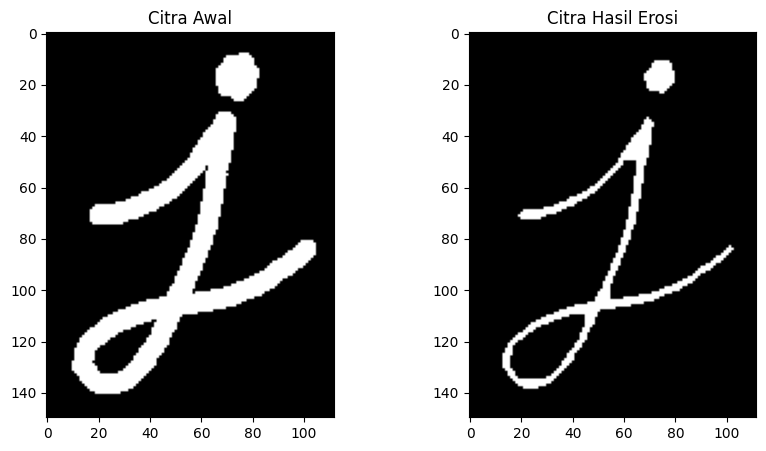

In [32]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks Images/Images/j.png', 0)
m, n = img.shape

k = 5
SE = np.ones((k, k), dtype=np.uint8)
constant = (k - 1) // 2

imgErode = cv.erode(img, SE, iterations=1)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img, cmap="gray")
axs[0].set_title('Citra Awal')
axs[1].imshow(imgErode, cmap="gray")
axs[1].set_title('Citra Hasil Erosi')

plt.show()

# Remove overlapping axes
axs[0].remove()
axs[1].remove()

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png) 


TANPA MENGGUNAKAN LIBRARY

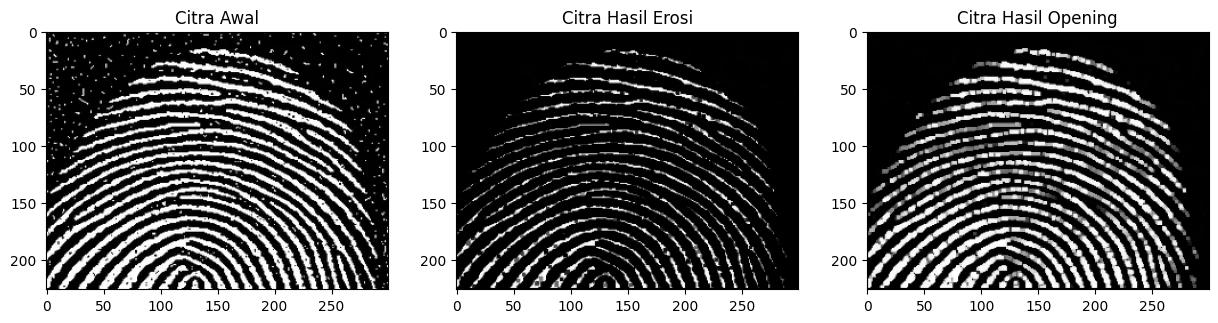

In [34]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks Images/Images/fingerprint.png', 0)
m, n = img.shape

k = 3
SE = np.ones((k, k), dtype=np.uint8)
constant = (k - 1) // 2

# Erosion
imgErode = np.zeros((m, n), dtype=np.uint8)
for i in range(constant, m - constant):
    for j in range(constant, n - constant):
        temp = img[i - constant:i + constant + 1, j - constant:j + constant + 1]
        product = temp * SE
        imgErode[i, j] = np.min(product)

# Dilation
imgOpen = np.zeros((m, n), dtype=np.uint8)
for i in range(constant, m - constant):
    for j in range(constant, n - constant):
        temp = imgErode[i - constant:i + constant + 1, j - constant:j + constant + 1]
        product = temp * SE
        imgOpen[i, j] = np.max(product)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img, cmap="gray")
axs[0].set_title('Citra Awal')
axs[1].imshow(imgErode, cmap="gray")
axs[1].set_title('Citra Hasil Erosi')
axs[2].imshow(imgOpen, cmap="gray")
axs[2].set_title('Citra Hasil Opening')

plt.show()

# Remove overlapping axes
axs[0].remove()
axs[1].remove()
axs[2].remove()

MENGGUNAKAN LIBRARY

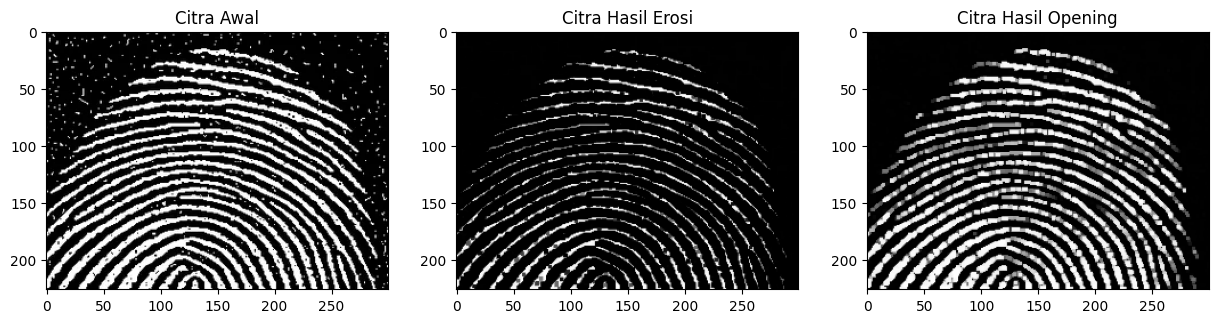

In [36]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks Images/Images/fingerprint.png', 0)
m, n = img.shape

k = 3
SE = np.ones((k, k), dtype=np.uint8)
constant = (k - 1) // 2

# Erosion
imgErode = cv.erode(img, SE, iterations=1)

# Dilation
imgOpen = cv.dilate(imgErode, SE, iterations=1)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img, cmap="gray")
axs[0].set_title('Citra Awal')
axs[1].imshow(imgErode, cmap="gray")
axs[1].set_title('Citra Hasil Erosi')
axs[2].imshow(imgOpen, cmap="gray")
axs[2].set_title('Citra Hasil Opening')

plt.show()

# Remove overlapping axes
axs[0].remove()
axs[1].remove()
axs[2].remove()

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png) 

TANPA MENGGUNAKAN LIBRARY

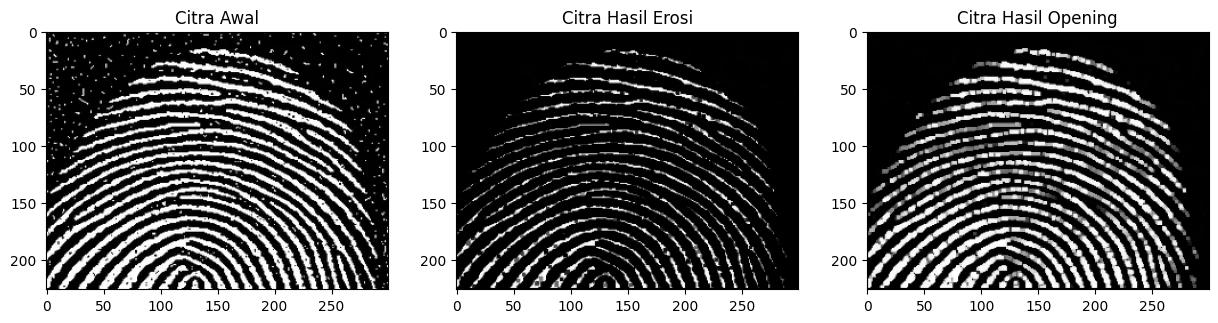

In [38]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks Images/Images/fingerprint.png', 0)
m, n = img.shape

k = 3
SE = np.ones((k, k), dtype=np.uint8)
constant = (k - 1) // 2

# Erosion
imgErode = np.zeros((m, n), dtype=np.uint8)
for i in range(constant, m - constant):
    for j in range(constant, n - constant):
        temp = img[i - constant:i + constant + 1, j - constant:j + constant + 1]
        product = temp * SE
        imgErode[i, j] = np.min(product)

# Dilation
imgOpen = np.zeros((m, n), dtype=np.uint8)
for i in range(constant, m - constant):
    for j in range(constant, n - constant):
        temp = imgErode[i - constant:i + constant + 1, j - constant:j + constant + 1]
        product = temp * SE
        imgOpen[i, j] = np.max(product)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img, cmap="gray")
axs[0].set_title('Citra Awal')
axs[1].imshow(imgErode, cmap="gray")
axs[1].set_title('Citra Hasil Erosi')
axs[2].imshow(imgOpen, cmap="gray")
axs[2].set_title('Citra Hasil Opening')

plt.show()

# Remove overlapping axes
axs[0].remove()
axs[1].remove()
axs[2].remove()

MENGGUNAKAN LIBRARY

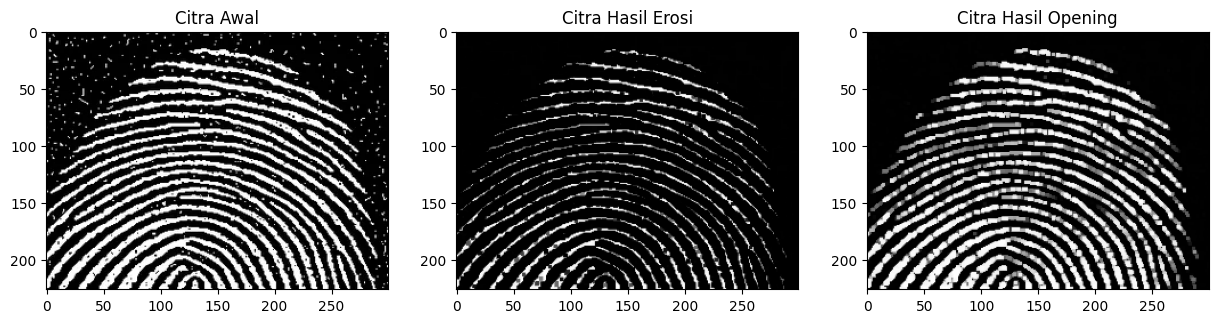

In [40]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks Images/Images/fingerprint.png', 0)
m, n = img.shape

k = 3
SE = np.ones((k, k), dtype=np.uint8)
constant = (k - 1) // 2

# Erosion
imgErode = cv.erode(img, SE, iterations=1)

# Dilation
imgOpen = cv.dilate(imgErode, SE, iterations=1)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img, cmap="gray")
axs[0].set_title('Citra Awal')
axs[1].imshow(imgErode, cmap="gray")
axs[1].set_title('Citra Hasil Erosi')
axs[2].imshow(imgOpen, cmap="gray")
axs[2].set_title('Citra Hasil Opening')

plt.show()

# Remove overlapping axes
axs[0].remove()
axs[1].remove()
axs[2].remove()